# Asari demo

One can install asari from pip (v 0.8.9 as today), or download from GitHub:

https://github.com/shuzhao-li/asari

If using from a copy from GitHub, 
copy the subdirectory asari into this working directory.

This notebook is run on
$docker run -v /Users/shuzhao/play/asari_test:/home/jovyan -p 8888:8888 jupyter/scipy-notebook

Do not use Jupyter notebook to process large batch data. This notebook is rather to illustrate the design to developers, and to allow any user to have a deep exploration of a small subset.

Shuzhao Li, 2022-1-31

In [1]:
import os, sys

!pip install pyopenms asari-metabolomics

# if needed
#!pip install mass2chem metDatamodel

# For local copy, one can download source from GitHub
#sys.path.append('asari')

     |████████████████████████████████| 61kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 153kB 1.9MB/s eta 0:00:01


In [2]:
from asari.main import *
from asari.workflow import *
from asari.peaks import *

In [4]:
PARAMETERS

{'project_name': 'test_asari',
 'min_intensity_threshold': 5000,
 'min_timepoints': 5,
 'signal_noise_ratio': 2,
 'peak_number_rt_calibration': 5,
 'cache_mass_traces': False,
 'output_filename': 'feature_table.tsv',
 'annotation_filename': 'annotation_table.tsv',
 'mode': 'pos',
 'mass_range': (50, 2000),
 'max_rtime': 300,
 'mz_tolerance': 5,
 'rtime_tolerance': 10,
 'initiation_samples': [],
 'prominence_window': 30,
 'gaussian_shape': 0.3,
 'min_prominence_threshold': 1666.6666666666667}

In [44]:
# One can change parameters here
# mode is valude
# not fully support in version 0.8.9 yet on all parameters
PARAMETERS['mode'] = 'neg'
PARAMETERS['min_intensity_threshold'] = 20000

In [3]:
mydir = 'T04/' # input mzML files in this directory, relative to root of this Notebook
EE = ext_Experiment()
EE.__init2__(read_project_dir(mydir), {}, PARAMETERS, '.')
EE.process_all()

Working on ~~ T04/ ~~ 


Processing MG_20211022_005.mzML, found 4897 mass tracks.
    Number of anchor m/z pairs = 1585
Processing MG_20211022_007.mzML, found 4338 mass tracks.
    Number of anchor m/z pairs = 1257
Processing MG_20211022_009.mzML, found 4951 mass tracks.
    Number of anchor m/z pairs = 1555
Processing MG_20211022_011.mzML, found 4579 mass tracks.
    Number of anchor m/z pairs = 1432
Processing MG_20211022_013.mzML, found 4558 mass tracks.
    Number of anchor m/z pairs = 1304
Processing MG_20211022_015.mzML, found 5150 mass tracks.
    Number of anchor m/z pairs = 1748

Initiating MassGrid, ...
    The reference sample is:
    ||* T04/MG_20211022_015.mzML *||

Adding sample to MassGrid, MG_20211022_007.mzML
    mapped pairs = 3584 / 4338 
Adding sample to MassGrid, MG_20211022_009.mzML
    mapped pairs = 4614 / 4951 
Adding sample to MassGrid, MG_20211022_011.mzML
    mapped pairs = 4397 / 4579 
Adding sample to MassGrid, MG_20211022_013.mzML
    mapped pairs = 4202 

### The above code finished all data files in the given directory

Three files were written in same dir for mass grid, feature table and Empirical compound annotaion (the last is glitchy in Notebooks).


In [6]:
# EE.annotate()
# check attributes and methods in EE, i.e. Experiment
print([x for x in dir(EE) if "__" not in x])
EE.CMAP.FeatureTable.columns

['CMAP', 'FeatureAnnotation', 'List_of_empCpds', 'ObservationAnnotation', '_get_ref_db_', 'allSamples', 'annotate', 'annotate_final', 'chromatography', 'export_feature_table', 'feature_DataFrame', 'files_meta_data', 'id', 'init_hot_db', 'initiation_samples', 'instrumentation', 'list_input_files', 'max_rtime', 'mode', 'number_of_samples', 'number_scans', 'ordered_samples', 'output_dir', 'parameters', 'process_all', 'process_initiation_samples', 'process_single_sample', 'provenance', 'reference_sample', 'samples_by_id', 'samples_by_name', 'samples_nonreference', 'serialize']


Index(['parent_masstrack_id', 'mz', 'apex', 'peak_area', 'height', 'left_base',
       'right_base', 'left_index', 'right_index', 'goodness_fitting',
       'feature_id', 'T04/MG_20211022_015.mzML', 'T04/MG_20211022_007.mzML',
       'T04/MG_20211022_009.mzML', 'T04/MG_20211022_011.mzML',
       'T04/MG_20211022_013.mzML', 'T04/MG_20211022_005.mzML'],
      dtype='object')

In [8]:
# MassGrid holds the mapping between features and peaks in each sample
EE.CMAP.MassGrid.head()

,mz,T04/MG_20211022_005.mzML,T04/MG_20211022_007.mzML,T04/MG_20211022_009.mzML,T04/MG_20211022_011.mzML,T04/MG_20211022_013.mzML,T04/MG_20211022_015.mzML
0,81.044625,0.0,0,0,0,1,0
1,81.520458,1.0,1,1,1,2,1
2,82.065031,2.0,2,2,2,3,2
3,83.049038,3.0,3,3,3,4,3
4,83.059655,4.0,4,4,4,5,4


In [7]:
# FeatureTable is a dataframe for features
EE.CMAP.FeatureTable.head()

,parent_masstrack_id,mz,apex,peak_area,height,left_base,right_base,left_index,right_index,goodness_fitting,feature_id,T04/MG_20211022_015.mzML,T04/MG_20211022_007.mzML,T04/MG_20211022_009.mzML,T04/MG_20211022_011.mzML,T04/MG_20211022_013.mzML,T04/MG_20211022_005.mzML
0,0,81.044625,448,650499.745233,25633.478966,423,473,374,424,0.474219,F1,237441,49285,128415,63670,46879,126744
1,1,81.520458,505,321428.298743,20474.384507,483,525,20,62,0.544877,F2,44503,111010,56508,77510,61285,28594
2,2,82.065031,554,399704.554238,21862.482556,543,570,494,521,0.378959,F3,21594,69785,114151,45562,73657,68634
3,3,83.049038,624,157574.927203,11076.451014,613,636,275,298,0.356736,F4,27370,42852,18528,26008,21329,19177
4,3,83.049038,760,374388.822518,13580.066472,737,776,399,438,0.126670,F5,37871,86652,71603,30024,90499,70581


In [10]:
EE.CMAP.FeatureTable.shape

(5748, 17)

In [9]:
# to check a sample data
EE.CMAP.FeatureTable['T04/MG_20211022_011.mzML'][:10]

0      63670
1      77510
2      45562
3      26008
4      30024
5      20912
6    5923628
7     872313
8    9451529
9     173103
Name: T04/MG_20211022_011.mzML, dtype: int64

In [13]:
good_features = EE.CMAP.FeatureTable[ EE.CMAP.FeatureTable['goodness_fitting']>0.6 ]

In [14]:
good_features.shape

(4297, 17)

In [16]:
# in good_features, how many have intensity > 100000 in sample 'T04/MG_20211022_011.mzML'

good_features[good_features['T04/MG_20211022_011.mzML'] > 100000].shape


(3076, 17)

In [17]:
# in good_features, how many have intensity > 100000 in sample 'T04/MG_20211022_005.mzML'

good_features[good_features['T04/MG_20211022_005.mzML'] > 100000].shape


(3269, 17)

## Plotting mass tracks

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mz_track(track):
    plt.figure(figsize=(12,3))
    X = track['rt_scan_numbers']
    Y = track['intensity']
    plt.plot(X,Y, '.')
    plt.title(track['mz'])


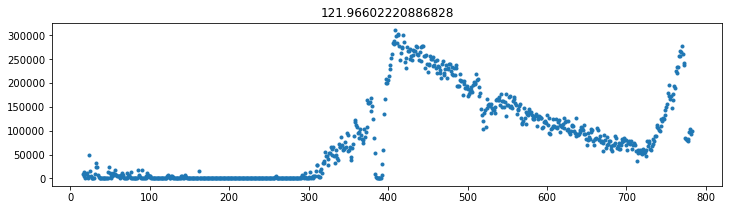

In [20]:
plot_mz_track(EE.CMAP.composite_mass_tracks[255])

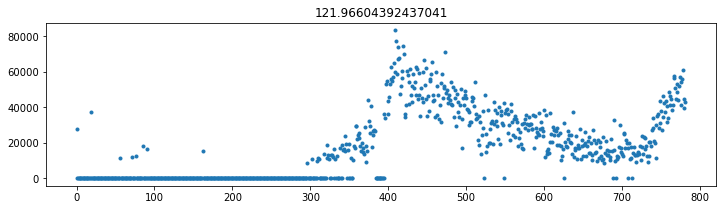

In [21]:
plot_mz_track(EE.reference_sample.list_mass_tracks[255])

In [24]:
# by looking at 'cmap_feature_table.csv'
# we see how features are associated with parent mass tracks
EE.CMAP.FeatureList[475:483]

[{'parent_masstrack_id': 500,
  'mz': 147.07628100770515,
  'apex': 463,
  'peak_area': 126887547.65763296,
  'height': 10173129.382870486,
  'left_base': 440,
  'right_base': 488,
  'left_index': 157,
  'right_index': 205,
  'goodness_fitting': 0.9126582606040231,
  'feature_id': 'F476'},
 {'parent_masstrack_id': 501,
  'mz': 147.08929572827887,
  'apex': 438,
  'peak_area': 1297867.9431884254,
  'height': 189841.3209876543,
  'left_base': 434,
  'right_base': 446,
  'left_index': 0,
  'right_index': 12,
  'goodness_fitting': 0.9049491433315906,
  'feature_id': 'F477'},
 {'parent_masstrack_id': 502,
  'mz': 147.0915351324243,
  'apex': 50,
  'peak_area': 427739.15616457636,
  'height': 29012.73161505863,
  'left_base': 40,
  'right_base': 70,
  'left_index': 16,
  'right_index': 46,
  'goodness_fitting': 0.5657273662690427,
  'feature_id': 'F478'},
 {'parent_masstrack_id': 502,
  'mz': 147.0915351324243,
  'apex': 183,
  'peak_area': 408175.9731025431,
  'height': 27594.72601071931,
 

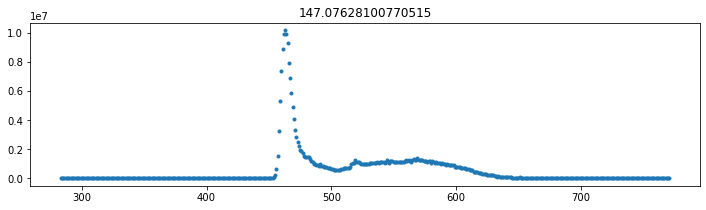

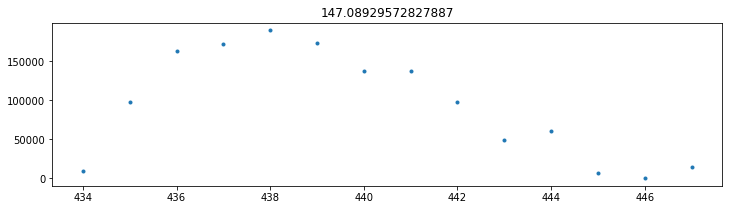

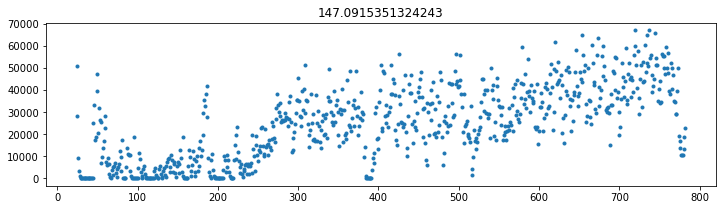

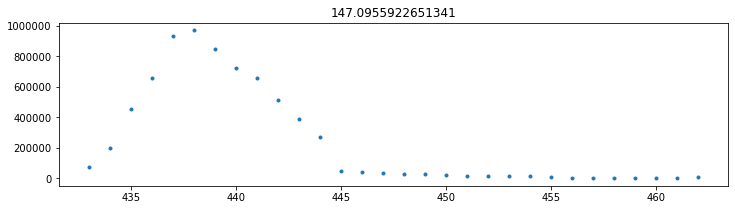

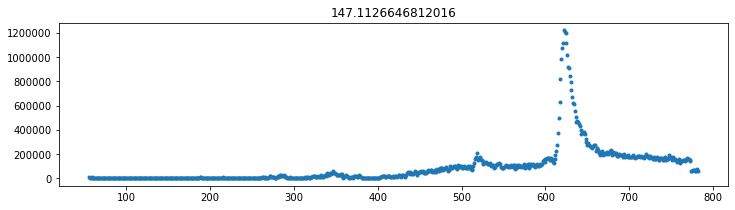

In [23]:
for ii in range(500,505):
    plot_mz_track(EE.CMAP.composite_mass_tracks[ii])

## Summary

This illustrates how to access the FeatureTable as a dataframe, and how to plot mass tracks.

Development is ongoing. Things may change.